<a href="https://colab.research.google.com/github/joseluan/ml_magalu/blob/main/Magalu_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import gdown


In [2]:

nome_arquivo = 'magalu.csv'
# Baixando o csv das ofertas
gdown.download(url='https://drive.google.com/file/d/1PY0Jea-Mu1dohKDaCkjA9ppvAGRuRwA2/view?usp=sharing', output=nome_arquivo, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1PY0Jea-Mu1dohKDaCkjA9ppvAGRuRwA2
To: /content/magalu.csv
100%|██████████| 94.1k/94.1k [00:00<00:00, 2.33MB/s]


'magalu.csv'

In [3]:
dataframe = pd.read_csv(nome_arquivo) # Carregando o csv das ofertas


##Pre-processamento

In [4]:
dataframe = dataframe.drop_duplicates() #Removendo duplicadas
dataframe = dataframe[dataframe['status'] != 'FINISHED'] # Retirando ofertas antigas
dataframe['status'] = dataframe['status'].replace('APPROVED', 1) # Mudando o valor de string para int
#dataframe['status'] = dataframe['status'].replace('FINISHED', 0) # Mudando o valor de string para int
dataframe['status'] = dataframe['status'].replace('REPPROVED', 0) # Mudando o valor de string para int

#Retirando linhas quando os valores de historico de ano, 6 meses e 3 meses do zoom forem igual a zero
dataframe = dataframe[dataframe['average_year'] > 0]
dataframe = dataframe[dataframe['var_year'] > 0]
dataframe = dataframe[dataframe['std_year'] > 0]

dataframe = dataframe[dataframe['average_six_months'] > 0]
dataframe = dataframe[dataframe['var_six_months'] > 0]
dataframe = dataframe[dataframe['std_six_months'] > 0]

dataframe = dataframe[dataframe['average_three_months'] > 0]
dataframe = dataframe[dataframe['var_three_months'] > 0]
dataframe = dataframe[dataframe['std_three_months'] > 0]

del dataframe['nome']

#del dataframe['var_year']
#del dataframe['std_year']

#del dataframe['var_six_months']
#del dataframe['std_six_months']

#del dataframe['var_three_months']
#del dataframe['std_three_months']


In [13]:
# Separando os dados entre treinamento e treino
X = dataframe.iloc[:,1:]
# a última coluna se refere a classe
y = dataframe.loc[:,'status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 297 to 204
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   old_price             136 non-null    float64
 1   average_year          136 non-null    float64
 2   var_year              136 non-null    int64  
 3   std_year              136 non-null    int64  
 4   average_six_months    136 non-null    float64
 5   var_six_months        136 non-null    float64
 6   std_six_months        136 non-null    float64
 7   average_three_months  136 non-null    float64
 8   var_three_months      136 non-null    float64
 9   std_three_months      136 non-null    float64
 10  status                136 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 12.8 KB


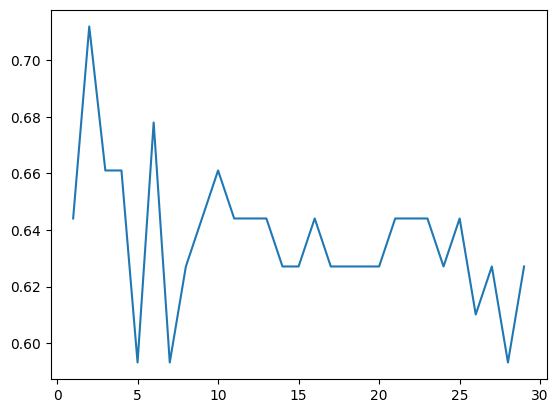

In [17]:
k_range = range(1,30)
scores = {}
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)


plt.plot(k_range,list(scores.values()))

##Avaliando com outras metricas

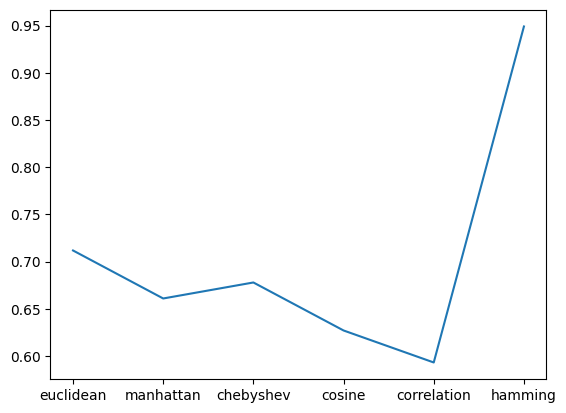

In [16]:
metricas = ['euclidean','manhattan', 'chebyshev', 'cosine', 'correlation', 'hamming']
scores = {}
for metrica in metricas:
  knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)


plt.plot(metricas,list(scores.values()))